# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
#(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data(label_mode=‘fine’)
(x_img_train, y_label_train), (x_img_test,y_label_test) = cifar100.load_data(label_mode='fine')

In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [8]:
#針對物件圖像數據集的類別編列成字典

label_dict={0:"a0",1:"a1",2:"a2",3:"a3",4:"a4",
            5:"a5",6:"a6",7:"a7",8:"a8",9:"a9",
            10:"a10",11:"a11",12:"a12",13:"a13",14:"a14",
            15:"a15",16:"a16",17:"a17",18:"a18",19:"a19",
            20:"a20",21:"a21",22:"a22",23:"a23",24:"a24",
            25:"a25",26:"a26",27:"a27",28:"a28",29:"a29",
            30:"a30",31:"a31",32:"a32",33:"a33",34:"a34",
            35:"a35",36:"a36",37:"a37",38:"a38",39:"a39",
            40:"a40",41:"a41",42:"a42",43:"a43",44:"a44",
            45:"a45",46:"a46",47:"a47",48:"a48",49:"a49",
            50:"a50",51:"a51",52:"a52",53:"a53",54:"a54",
            55:"a55",56:"a56",57:"a57",58:"a58",59:"a59",
            60:"a60",61:"a61",62:"a62",63:"a63",64:"a64",
            65:"a65",66:"a66",67:"a67",68:"a68",69:"a69",
            70:"a70",71:"a71",72:"a72",73:"a73",74:"a74",
            75:"a75",76:"a76",77:"a77",78:"a78",79:"a79",
            80:"a80",81:"a81",82:"a82",83:"a83",84:"a84",
            85:"a85",86:"a86",87:"a87",88:"a88",89:"a89",
            90:"a90",91:"a91",92:"a92",93:"a93",94:"a94",
            95:"a95",96:"a96",97:"a97",98:"a98",99:"a99",
           }

In [9]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=500):
    fig = plt.gcf()
    fig.set_size_inches(12, 140)
    if num>500: num=500 
    for i in range(0, num):
        ax=plt.subplot(100,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

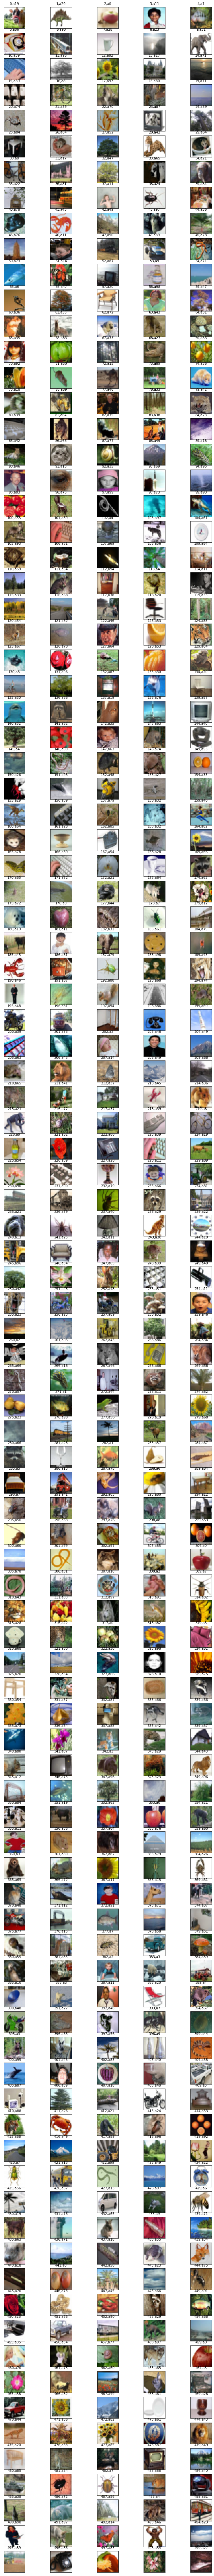

In [10]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [11]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [12]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [13]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [14]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [15]:
y_label_train.shape

(50000, 1)

In [17]:
y_label_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

In [18]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [19]:
y_label_train_OneHot.shape

(50000, 100)

In [20]:
y_label_train_OneHot[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.